# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

**Deadline:** Thursday, April 12, 2018

In [0]:
# Please fill in your names here
NAME_STUDENT_1 = "A. Siganos"
NAME_STUDENT_2 = "J. Gómez Robles"

In [0]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## Backpropagation (6 points)

Figure 1 illustrates a simple neural network model.

![Figure 1](images/a4_network.png)

It has single input $x$, and three layers with respectively one, two, and one neurons. The activation function of the neurons is ReLU. 

The parameters $w_1$, $w_2$, $w_3$, $w_4$, and $w_5$ (no biases) are initialized to the following values $w_1 = 2, w_2 = 1$, $w_3 = 2$, $w_4 = 4$, and $w_5 = 1$. Implement a single update step of the gradient descent algorithm by hand. Run the update state for the data point $(x=2, y=3)$:

The goal is to model the relationship between two continuous variables. The learning rate is set to $0.1$

Provide the solution in the following format:

- A choice for a loss function 
- Compute graph for training the neural network
- Partial derivative expression for each of the parameters in the model
- The update expression for each of the parameters for each of the data-points
- The final value of all four parameters after the single step in the gradient descent algorithm

The Python code for simple computational graph nodes, as seen in the tutorial session, is provided in the cell below (run the cell to load the code, and again to run the code). Extend the nodes so they can be used to implement the network described above. Implement the network with the same initial weights and the correct learning rate, and verify your hand-made calculations. Add comments to your code or provide a separate description to explain the changes you have made.

### Solution

**Loss function**

For this problem, we have choosen the Mean Squared Error defined as follow:

$$
L = \frac{\left(\hat{o} - y\right)^2}{2}
$$

where:

- $\hat{o}$: The prediction

- $y$: The true value

**Compute graph**

![Figure 1](https://lh3.googleusercontent.com/bTxjSuuYeaWaQNyFXoDDG3C8NaOfwPvjHHiLDSj_r4Zu5_dSmY62FfqQzf_JZowhj4-c-IbvuboziHMcRq4HeSE7Ey-1D3lK4YUj0bopLmFC2youIOXFOLGngHbKj1MB_bHPrgPrp5smrguoTNhOwCmJao24c-NtvsEhlNWv63TzJ9I50cvMxd4dozDB5qGe_fVed3E2-Ug0MOu0xyPe6-rosu0wFjeKOk5aUJ1gRTKumMDf_thYC8xEf93ei_YNxr6OGJrFHfpYpPK6qOoqeWqQO_vMMYIMVUn5GzN1iGVqpgdMmGpvRqohjhW31UpnTPfIWUPcZ10r5tk6LuCAEIjTmFnSvn0DMSOIyGS7Xk-o4B0CoU9p2T7Wi5O_UwzRd5WPgYpNrQQ4o7L8PNK9OVo5oc7-5IWr4y4EHyBjaUk72uiAV3LTefZk8iCFsK8tJ8MTdSdKMDrtOMvAVAUCvPmrTBtrBBcqEKT9A0VXEIUYWLDv2Cd8AnLk_e7wBWoBBhFvwLTKjPUxDQf9lZzoZYjXtGlp-a0EAs5pVeS2xYuqz2FT2hnlhKfjBAu-dxBRa-yNT38MtHiblzZc-ZAnornYFlddFQh0jSEbP1epj6aLFgVrT7xytnqu8LsGoGqABo78kGET5ZcPkvbdCWHAPgDniNDpyoj-fQ=w860-h395-no)


where:

$$
o_1 = w_1 . x \\
o_2 = w_2 . o_1 \\
o_3 = w_3 . o_1 \\
o_4 = w_4 . o_2 \\
o_5 = w_5 . o_3 \\
o_6 = o_4 + o_5
$$

Specifcally, for this problem our loss is defined as:

$$
L = \frac{(o_6 - y)^2}{2}
$$

**Partial derivative expressions**

First, we show the derivative expressions for loss and outputs $o_i$. Note that for $o_1$ we obtain two expressions because of the split of this output in the first multiplication node.


$$
\frac{\partial L}{\partial L} = 1 \\
\frac{\partial L}{\partial o_6} = \frac{\partial}{\partial o_6} \frac{(o_6 - y)^2}{2} = o_6 - y = 24 - 3 = 21 \\
\frac{\partial L}{\partial o_5} = \frac{\partial o_6}{\partial o_5} \frac{\partial L}{\partial o_6} = \frac{\partial (o_4 + o_5)}{\partial o_5} \frac{\partial L}{\partial o_6} = 1  (o_6 - y ) = 1 \cdot 21 = 21 \\
\frac{\partial L}{\partial o_4} = \frac{\partial o_6}{\partial o_4} \frac{\partial L}{\partial o_6} = \frac{\partial (o_4 + o_5)}{\partial o_4} \frac{\partial L}{\partial o_6} = 1 (o_6 - y ) = 1 \cdot 21 = 21 \\
\frac{\partial L}{\partial o_3}
= \frac{\partial o_5}{\partial o_3} \frac{\partial L}{\partial o_5}
= \frac{\partial (o_3 \cdot w_5)}{\partial o_3} (o_6 - y )
= w_5 \cdot (o_6 - y ) = 1 \cdot 21 = 21\\
\frac{\partial L}{\partial o_2}
= \frac{\partial o_4}{\partial o_2} \frac{\partial L}{\partial o_4}
= \frac{\partial (o_2 \cdot w_4)}{\partial o_2} (o_6 - y )
= w_4 \cdot (o_6 - y ) = 4\cdot 21 = 84 \\
\frac{\partial L}{\partial o_1}
= \frac{\partial o_2}{\partial o_1} \frac{\partial L}{\partial o_2}
= \frac{\partial (w_2 \cdot o_1)}{\partial o_1} (o_6 - y )
= w_2 \cdot (o_6 - y ) = 1 \cdot 21 = 21\\
\frac{\partial L}{\partial o_1}
= \frac{\partial o_3}{\partial o_1} \frac{\partial L}{\partial o_3}
= \frac{\partial (w_3 . o_1)}{\partial o_1} (o_6 - y )
= w_3 \cdot (o_6 - y ) = 2 \cdot 21 = 42
$$


On the other hand, for the weights (note that $w_1$ is now updated twice because of the split in the first multiplication node), we obtain:

$$
\frac{\partial L}{\partial w_5} = \frac{\partial o_5}{\partial w_5} \frac{\partial L}{\partial o_5} = \frac{\partial (o_3 w_5)}{\partial w_5} (o_6 - y) = o_3(o_6 - y) = 8 \cdot 21 = 168 \\
\frac{\partial L}{\partial w_4} = \frac{\partial o_4}{\partial w_4} \frac{\partial L}{\partial o_4} = \frac{\partial (o_2 w_4)}{\partial w_4} (o_6 - y) = o_2(o_6 - y) = 4 \cdot 21 = 84 \\
\frac{\partial L}{\partial w_3} = \frac{\partial o_3}{\partial w_3} \frac{\partial L}{\partial o_3} = \frac{\partial (o_1 w_3)}{\partial w_3} w_5 (o_6 - y) = o_1 \cdot w_5 (o_6 - y) = 4 \cdot 1 \cdot 21 = 84 \\
\frac{\partial L}{\partial w_2} = \frac{\partial o_2}{\partial w_2} \frac{\partial L}{\partial o_2} = \frac{\partial (o_1 w_2)}{\partial w_2} w_4(o_6 - y) = o_1 \cdot w_4(o_6 - y) = 4 \cdot 4 \cdot 21 = 336 \\
\frac{\partial L}{\partial w_1} = \frac{\partial o_1}{\partial w_1} \frac{\partial L}{\partial o_1} = \frac{\partial (x w_1)}{\partial w_1}  w_2 (o_6 - y) = x \cdot w_2 (o_6 - y) = 2 \cdot 21 = 42 \\
\frac{\partial L}{\partial w_1} = \frac{\partial o_1}{\partial w_1} \frac{\partial L}{\partial o_1} = \frac{\partial (x w_1)}{\partial w_1}  w_3 (o_6 - y) = x \cdot w_3 (o_6 - y) = = 2 \cdot 42 = 84
$$

**Update expressions**

The learning rule is defined as:

$$
w = w - \alpha \frac{\partial L}{\partial w} 
$$

For our weights, the results are:

$$
w_5 = w_5 - \alpha \frac{\partial L}{\partial w_5} = w_5 - \alpha \cdot o_3(o_6 - y) \\
w_4 = w_4 - \alpha \frac{\partial L}{\partial w_4} = w_4 - \alpha \cdot o_2(o_6 - y) \\
w_3 = w_3 - \alpha \frac{\partial L}{\partial w_3} = w_3 - \alpha \cdot o_1 \cdot w_5(o_6 - y) \\
w_2 = w_2 - \alpha \frac{\partial L}{\partial w_2} = w_2 - \alpha \cdot o_1 \cdot w_4(o_6 - y) \\
w_1' = w_1 - \alpha \frac{\partial L}{\partial w_1} = w_1 - \alpha \cdot x \cdot w_2(o_6 - y) \\
w_1 = w_1' - \alpha \frac{\partial L}{\partial w_1} = w_1' - \alpha \cdot x \cdot w_3(o_6 - y)
$$

**Final value for all parameters**

The final values of our paremeters (weights) are:

- $w_5 = 1 - (0.1)(168) = - 15.8$
- $w_4 = 4 - (0.1)(84) = -4.4$
- $w_3 = 2 - (0.1)(84) = -6.4$
- $w_2 = 1 - (0.1)(336) = -32.6$
- $w_1' = 2 - (0.1)(84) = -6.4$
- $w_1 = -6.4 - (0.1)(168) = -23.2$

Our initial loss is $L = 220.5$

And our final loss is $L = 4.5$


#### Code explanation

To ease the analysis of solution, we have removed the unused code from the original version. The code itself contains the comments to understand the modifications performed.



In [8]:
# %load basic_graph.py
'''
Implementations of nodes for a computation graph. Each node
has a forward pass and a backward pass function, allowing
for the evaluation and backpropagation of data.
'''

from abc import ABC, abstractmethod
import math
import time

# We still preserve the abstract class Node 
class Node(object):

    def __init__(self, inputs):
        self.inputs = inputs

    @abstractmethod
    def forward(self):
        ''' Feed-forward the result '''
        raise NotImplementedError("Missing forward-propagation method.")

    @abstractmethod
    def backward(self, d):
        ''' Back-propagate the error
            d is the delta of the subsequent node in the network '''
        raise NotImplementedError("Missing back-propagation method.")

# ConstantNode is never affected. Its initial value is always preserved. Hence,
# forward is just the replication of the value and backward does nothing, which
# can be interpreted as the end of the backpropagation.
# This node is used to represent the input x and the target y.
class ConstantNode(Node):

    def __init__(self, value):
        self.output = value

    def forward(self):
        logging.debug("[ConstantNode] Fordwarding value = {}".format(self.output))
        return self.output

    # Input never changes
    def backward(self, d):
        logging.debug("[ConstantNode] Nothing to backward. Value: {}".format(
            self.output))
        pass

# VariableNode is a value that can modify its value. For forward(), we only
# replicate the output. For backward() we apply the learning rule with the
# requested learning_rate. This is 1 of the ending nodes of the backpropagation
class VariableNode(Node):

    def __init__(self, value):
        self.output = value

    def forward(self):
        logging.debug("[VariableNode] Fordwarding value = {}".format(self.output))
        return self.output

    # Update the variable node according the learning rule
    def backward(self, d, learning_rate = 0.1):
        logging.debug("[VariableNode] Updated weight from {} to {}".format(
            self.output, self.output - learning_rate * d))
        self.output -= learning_rate * d # Gradient Descent


# Recall that Node has "inputs". AdditionNode just sums the forward values 
# of each input. For backward() it just backwards the parent nodes.
class AdditionNode(Node):

    def forward(self):
        self.output = sum([i.forward() for i in self.inputs])
        logging.debug("[AdditionNode] Fordwarding value = {}".format(self.output))
        return self.output

    def backward(self, d):
        # Go backwards for each neuron connected (they should be mult.)
        for i in self.inputs:
            logging.debug("[AdditionNode] Backwarding parent node of class {} with value {} ".format(type(i), i.output))
            i.backward(d)

# Recall that Node has "inputs". MultiplicationNode just multiplies
# two forwarded inputs. For backpropagation, the gradient is d * x
class MultiplicationNode(Node):

    def forward(self):
        self.output = self.inputs[0].forward() * self.inputs[1].forward()
        logging.debug("[MultiplicationNode] Fordwarding value = {}".format(self.output))
        return self.output

    def backward(self, d):
          # Backwards to xi and wi, which are constant and variable, respectively
          logging.debug("[MultiplicationNode] Backwarding parent node with value {}".format(self.inputs[0].output))
          self.inputs[0].backward(d * self.inputs[1].output)
          logging.debug("[MultiplicationNode] Backwarding parent node with value {}".format(self.inputs[1].output))
          self.inputs[1].backward(d * self.inputs[0].output) 

# This is the MeanSquaredError node. It assumes that the second input is
# the correct value. The first input is the prediction. Forward is the MSE error
# presented in the formulas and backward is the gradient as presented in the
# formulas
class MSENode(Node):

    def forward(self):
        self.output = 0.5 * (
            self.inputs[0].forward() - self.inputs[1].forward())**2
        logging.debug("[MSENode] Fordwarding value = {}".format(self.output))
        return self.output

    def backward(self, d):
          # Prediction
          logging.debug("[MSENode] Backwarding prediction node with value {}".format(self.inputs[0].output))
          self.inputs[0].backward(d * (self.inputs[0].output - self.inputs[1].output))
          # Real target
          logging.debug("[MSENode] Backwarding target node with value {}".format(self.inputs[1].output))
          self.inputs[1].backward(d * (self.inputs[1].output - self.inputs[0].output))
    

# Relu function.
# Forward is defined as max(0, x). Backward is given by the next equations:
# f'(x) = 0 if x <=0 ; f'(x) = 1 if x > 0
class ReLUNode(Node):

    def forward(self):
        self.output = max(0, self.inputs[0].forward())
        logging.debug("[ReLUNode] Fordwarding value = {}".format(self.output))
        return self.output

    def backward(self, d):
        logging.debug("[ReLUNode] Backwarding parent node with value {}".format(self.inputs[0].output))
        argument = 1 if self.output > 0 else 0
        self.inputs[0].backward(d * argument)

# The neuron has no significant changes
class Neuron(Node):

    def __init__(self, inputs, weights, activation):
        ''' weights: list of initial weights, same length as inputs '''
        self.inputs = inputs # Inputs are nodes also. Can be constant, variable, etc

        # Initialize a weight for each input
        self.weights = [VariableNode(weight) for weight in weights]

        # Multiplication node for each pair of inputs and weights
        mults = [MultiplicationNode([i, w]) for i, w, in zip(self.inputs, self.weights)]

        # Sum all multiplication results
        added = AdditionNode(mults)

        # Apply activation function
        if activation.lower() == 'sigmoid':
            self.graph = SigmoidNode([added])
        elif activation.lower() == 'relu':
            self.graph = ReLUNode([added])
        elif activation.lower() == 'tanh':
            self.graph = TanhNode([added])
        else:
            raise ValueError("Unknown activation function.")

    def forward(self):
        # Evaluates the activation function
        self.output = self.graph.forward()
        logging.debug("[Neuron] Fordwarding value = {}".format(self.output))
        return self.output

    def backward(self, d):
        logging.debug("[Neuron] Backwarding with d = {}".format(d))
        # Go back from the activation function
        self.graph.backward(d)

    def get_weights(self):
        return [weight.output for weight in self.weights]

if __name__ == '__main__':
    print("Loaded simple graph nodes")
    

'\nImplementations of nodes for a computation graph. Each node\nhas a forward pass and a backward pass function, allowing\nfor the evaluation and backpropagation of data.\n'

Loaded simple graph nodes


In [0]:
################################################################################
## The input layer contains only constant nodes, this is, the x variables. We ##
## implement the backward of each node, but since the backward of constant is ##
## skipped, it does not affect. ################################################
################################################################################
class InputLayer(Node):
    
    def __init__(self, x, name = None):
        self.nodes = [ConstantNode(xi) for xi in x]
        self.name = name
        
    def forward(self):
        pass # No need to compute forward of constant nodes
    
    def backward(self, i):
          for node in self.nodes:
              node.backward(None)

    def summary(self):
        print("Input Layer '{}' with {} inputs".format(self.name, len(self.nodes)))
        for i in range(len(self.nodes)):
            print("\tx{}: {}".format(i, self.nodes[i].output))


################################################################################
## The hidden layer receives an input layer or another hidden layer, then we  ##
## have to handle both cases. If it is an input layer, then we call the nodes ##
## otherwise, we call the neurons. This could be also be fixed by calling the ##
## neurons nodes, but we prefer making the distinction for clarity.           ##
## Additionally, for forward we just forward the values of the neurons. For   ##
## backward() we do nothing since everything should be backpropagated from    ##
## the output layer. ###########################################################
################################################################################
class HiddenLayer(Node):
    
    def __init__(self, parentLayer, num_neurons, weights = None, activation ='sigmoid', name = None):
        
        # Random weights if we do not specify
        if weights == None:
            weights = []
            for c in range(len(num_neurons)):
                weights.add(np.random.uniform(0,5, len(inputLayer.nodes)))
            
        # If an InputLayer, my inputs are the parentLayer.nodes
        if isinstance(parentLayer, InputLayer): 
            self.neurons = [Neuron(parentLayer.nodes, weights = weights[i], activation = activation)
                for i in range(num_neurons)] # As many identical neurons as requested
        
        # If another HiddenLayer, then my inputs are the neurons
        if isinstance(parentLayer, HiddenLayer):
            self.neurons = [Neuron(parentLayer.neurons, weights = weights[i], activation = activation)
                for i in range(num_neurons)] # As many identical neurons as requested

        self.name = name
        
    def forward(self):
        for neuron in self.neurons:
            neuron.forward()

    def backward(self, i):
        pass

    def summary(self):
        print("Hidden Layer '{}' with {} neuron(s)".format(self.name, len(self.neurons)))
        for i in range(len(self.neurons)):
            print("\tn{} with input weights : {}".format(i, self.neurons[i].get_weights()))
    

################################################################################
## The output layer receives a hidden layer for us, but we could receive also ##
## an input layer, hence we make the distinction again for clarity.           ##
## The output layer has only the MSE node. Even if have a for loop, in our    ##
## problem we only have one MSE node. Forwarding and backwarding is just the  ##
## backward of the activation function which will trigger the other values.   ##
################################################################################
class OutputLayer(Node):
    
    # TODO: is it realy just one target?
    def __init__(self, parentLayer, target, activation = 'mse', name = None):
        self.name = name
        
        if isinstance(parentLayer, HiddenLayer): 
            self.nodes = [] # MSE nodes
            for neuron in parentLayer.neurons:
                self.nodes.append(MSENode([neuron, ConstantNode(target)]))
            self.graph = AdditionNode(self.nodes)

    def forward(self):
        self.output = self.graph.forward()
        return self.output

    def backward(self, i):
        self.graph.backward(i)

    def summary(self):
        print("Output Layer '{}' (MSE) with {} neuron(s)".format(self.name, len(self.nodes)))
        for i in range(len(self.nodes)):
            print("\tExpected value for n{} : {}".format(i, self.nodes[i].inputs[1].output))


In [10]:
################################################################################
## Final model. This can be also understood as the compute graph. It is a set ##
## of layers, starting from the input layer. neural_network has the final     ##
## graph and then we forward from it to recursively obtain the answers. We    ##
## print the result and then we backpropagate. We show the final weights and  ##
## finally we print the new MSE. One can observe that we reduced the error    ##
## significantly with just one passing, but obtained negative weights.        ##
################################################################################

inputLayer = InputLayer(x = [2], name = "Input")
inputLayer.summary()

# # First hidden layer
hL1 = HiddenLayer(parentLayer = inputLayer, num_neurons = 1, weights = [[2]], activation = "relu", name = "HL1")
hL1.summary()

hL2 = HiddenLayer(parentLayer = hL1, num_neurons = 2, weights = [[1], [2]], activation = "relu", name = "HL2")
hL2.summary()

hL3 = HiddenLayer(parentLayer = hL2, num_neurons = 1, weights = [[4, 1]], activation = "relu", name = "HL3")
hL3.summary()

neural_network = OutputLayer(parentLayer = hL3, target = 3, activation = "mse", name = "Output")
neural_network.summary()

res = neural_network.forward()

print("\nLoss: {}".format(res))

print("\nBack-propagating...")
neural_network.backward(1.0)

print("Showing layers after back-propagation...\n")
inputLayer.summary()
hL1.summary()
hL2.summary()
hL3.summary()
neural_network.summary()

res = neural_network.forward()
print("\nLoss : {}".format(res))

Input Layer 'Input' with 1 inputs
	x0: 2
Hidden Layer 'HL1' with 1 neuron(s)
	n0 with input weights : [2]
Hidden Layer 'HL2' with 2 neuron(s)
	n0 with input weights : [1]
	n1 with input weights : [2]
Hidden Layer 'HL3' with 1 neuron(s)
	n0 with input weights : [4, 1]
Output Layer 'Output' (MSE) with 1 neuron(s)
	Expected value for n0 : 3

Loss: 220.5

Back-propagating...
Showing layers after back-propagation...

Input Layer 'Input' with 1 inputs
	x0: 2
Hidden Layer 'HL1' with 1 neuron(s)
	n0 with input weights : [-23.200000000000003]
Hidden Layer 'HL2' with 2 neuron(s)
	n0 with input weights : [-32.6]
	n1 with input weights : [-6.4]
Hidden Layer 'HL3' with 1 neuron(s)
	n0 with input weights : [-4.4, -15.8]
Output Layer 'Output' (MSE) with 1 neuron(s)
	Expected value for n0 : 3

Loss : 4.5


## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Submit an explanation for the limitation of the original model. Explain your modification. 
Submit your code and 6 plots (can be overlaid) for the training performance of both models with different depths. 



In [1]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 10

Using TensorFlow backend.


In [2]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


Here we run all 3 possible models with the original parameters. For ease we show all 3 possible model accuracies overlaid. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 2.0278 - acc: 0.3393 - val_loss: 1.6435 - val_acc: 0.7408
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.4812 - acc: 0.6264 - val_loss: 1.1954 - val_acc: 0.8072
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.1348 - acc: 0.7234 - val_loss: 0.9244 - val_acc: 0.8332
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.9259 - acc: 0.7673 - val_loss: 0.7665 - val_acc: 0.8470
Epoch 5/10
48896/60000 [=======================>......] - ETA: 0s - loss: 0.8061 - acc: 0.7916

60000/60000 [==============================] - 3s 46us/step - loss: 0.7981 - acc: 0.7915 - val_loss: 0.6666 - val_acc: 0.8532
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.7176 - acc: 0.8092 - val_loss: 0.6002 - val_acc: 0.8653
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.6592 - acc: 0.8207 - val_loss: 0.5517 - val_acc: 0.8715
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.6117 - acc: 0.8323 - val_loss: 0.5160 - val_acc: 0.8739
Epoch 9/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.5821 - acc: 0.8369 - val_loss: 0.4885 - val_acc: 0.8784
Epoch 10/10
17408/60000 [=======>......................] - ETA: 1s - loss: 0.5671 - acc: 0.8398

60000/60000 [==============================] - 3s 46us/step - loss: 0.5553 - acc: 0.8428 - val_loss: 0.4666 - val_acc: 0.8818
Test score: 0.46660534963607786
Test accuracy: 0.8818
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
____________________________________________

60000/60000 [==============================] - 3s 58us/step - loss: 2.3304 - acc: 0.1203 - val_loss: 2.2318 - val_acc: 0.2801
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 2.2487 - acc: 0.1684 - val_loss: 2.1447 - val_acc: 0.5262
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 2.1533 - acc: 0.2452 - val_loss: 2.0311 - val_acc: 0.6075
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 2.0268 - acc: 0.3362 - val_loss: 1.8739 - val_acc: 0.6258
Epoch 5/10
59648/60000 [============================>.] - ETA: 0s - loss: 1.8527 - acc: 0.4294

60000/60000 [==============================] - 3s 54us/step - loss: 1.8521 - acc: 0.4297 - val_loss: 1.6636 - val_acc: 0.6888
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.6426 - acc: 0.5089 - val_loss: 1.4361 - val_acc: 0.7007
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 1.4364 - acc: 0.5732 - val_loss: 1.2320 - val_acc: 0.7693
Epoch 8/10
60000/60000 [==============================] - 3s 54us/step - loss: 1.2568 - acc: 0.6248 - val_loss: 1.0677 - val_acc: 0.7790
Epoch 9/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.1196 - acc: 0.6605 - val_loss: 0.9460 - val_acc: 0.7879


Epoch 10/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.0140 - acc: 0.6918 - val_loss: 0.8538 - val_acc: 0.7968
Test score: 0.8538445023536683
Test accuracy: 0.7968
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________

60000/60000 [==============================] - 4s 64us/step - loss: 2.3610 - acc: 0.1045 - val_loss: 2.2966 - val_acc: 0.1136
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.3491 - acc: 0.1043 - val_loss: 2.2947 - val_acc: 0.1028
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.3364 - acc: 0.1101 - val_loss: 2.2890 - val_acc: 0.1010
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.3315 - acc: 0.1100 - val_loss: 2.2841 - val_acc: 0.2117
Epoch 5/10
41856/60000 [===================>..........] - ETA: 1s - loss: 2.3204 - acc: 0.1162

60000/60000 [==============================] - 4s 59us/step - loss: 2.3190 - acc: 0.1161 - val_loss: 2.2775 - val_acc: 0.1169
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.3098 - acc: 0.1212 - val_loss: 2.2707 - val_acc: 0.1660
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 2.3021 - acc: 0.1245 - val_loss: 2.2641 - val_acc: 0.3015
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.2927 - acc: 0.1353 - val_loss: 2.2555 - val_acc: 0.2144
Epoch 9/10
41856/60000 [===================>..........] - ETA: 1s - loss: 2.2859 - acc: 0.1392

60000/60000 [==============================] - 4s 60us/step - loss: 2.2829 - acc: 0.1418 - val_loss: 2.2469 - val_acc: 0.2633
Epoch 10/10
60000/60000 [==============================] - 3s 58us/step - loss: 2.2707 - acc: 0.1556 - val_loss: 2.2314 - val_acc: 0.2658
Test score: 2.2314223358154295
Test accuracy: 0.2658
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


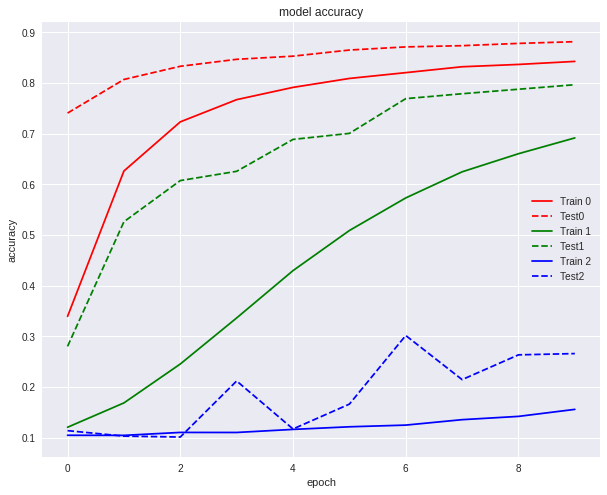

In [4]:
#------------------------ Original Models-----------------------
trainlegend = ['train1','train2','train3']
testlegend = ['test1','test2','test3']
myColors = ['r', 'g', 'b', 'y']
plt.figure(figsize = (10, 8))
for i in range(3):
  model = Sequential()
  model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
  model.add(Dropout(0.2))
  number_hidden_layers=i
  while number_hidden_layers >= 1:
      model.add(Dense(512))
      model.add(Activation('sigmoid'))
      model.add(Dropout(0.2))
      number_hidden_layers -= 1
  number_hidden_layers = number_hidden_layers+1
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])
  history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'], c = myColors[i], label = "Train " + str(i)) #change style and color
  plt.plot(history.history['val_acc'], c = myColors[i], label = "Test" + str(i), linestyle = "--")
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend([trainlegend[i], testlegend[i]], loc='upper left')
plt.legend()
#plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
plt.show()
  

As we can see from the plot above, the more layers we add the worse the models perform. One of the  reasons is the fact that we use sigmoid for the hiden layer as well.  With MNIST, we are trying to predict based on probabilities.
The sigmoid function "squishes" the weights between 0 and 1. Moreover sigmoid  tends to create the "vanishing gradient problem", which is common with sigmoid as 
an activation funstion especially for multiple layers, which is the reason of the decreasing accuracy. Using softmax as the activation function for the output layer seems logical, since it is the norm for classification problems with multiple classes, so this will not be modified

On the other hand the ReLU function which we use later does not squish the values. If the value is less than 0, then the output is 0. If its more than 0, the answer is the value itself. This leaves for more space for the parameters to "train" and find the best possible changes for w's. Also, having multiple layers (aka a deep network) makes our network more eager to recognize certain aspects of input data. For example, if we want to find the details of the number "5" having more layers than needed can lead to overfiting.
Specifically we get:

-For 1 hidden layer:  88%
-For 2 hidden layers: 79%
-For 3 hidden layers: 26%



   In the next cell we train the modified models. We increased the dropout to 0.4 to reduce overfitting and generalize in a more efficient way. The idea is that in each step each neuron has a probabilty of 'p' of drop rate, meaning that it will be ignored for the current step but it can be use for the next one. A typical values is 50%, in our case 40% seemed to provide slightly better results.
   
   To determine which activation function to use for the extra hidden layer first we tried a number of different functions like 'linear' 'relu' etc. Out of all possible activation functions relu was one of the best performance in terms of loss, meaning that it was among the lowests. Additionaly, the selection of relu is justified by the fact that the actual function takes in account only positive "probabilities" of the neurons since it serves as a thresholded at zero. This also led in a  better performance in time, especially compared to other functions. Finally since we also used SGD as our optimizer picking relu makes even more sence since it has been found to accelerate the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form in 'ImageNet Classification with Deep Convolutional Neural Networks' paper.
(http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf)

Running for multiple number of neurons, we observed that it does affect the model performance. When a neural network has too few hidden neurons (< 64), it does not have the capacity to learn enough of the underlying patterns to distinguish between 0 – 9 effectively. When the neural network has >= 64 neurons, the neural network start to do better. At increasing number of hidden neurons (>= 256), the number of hidden neurons does not help too much for this problem.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.1532 - acc: 0.7177 - val_loss: 0.6272 - val_acc: 0.8587
Epoch 2/10
51328/60000 [========================>.....] - ETA: 0s - loss: 0.5719 

60000/60000 [==============================] - 3s 46us/step - loss: 0.5597 - acc: 0.8592 - val_loss: 0.4481 - val_acc: 0.8879
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4500 - acc: 0.8786 - val_loss: 0.3840 - val_acc: 0.9012
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4013 - acc: 0.8894 - val_loss: 0.3504 - val_acc: 0.9065
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3723 - acc: 0.8958 - val_loss: 0.3269 - val_acc: 0.9128
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3508 - acc: 0.9020 - val_loss: 0.3100 - val_acc: 0.9171
Epoch 7/10
17280/60000 [=======>......................] - ETA: 1s - loss: 0.3421 - acc: 0.9036

60000/60000 [==============================] - 3s 46us/step - loss: 0.3324 - acc: 0.9065 - val_loss: 0.2966 - val_acc: 0.9188
Epoch 8/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3184 - acc: 0.9098 - val_loss: 0.2850 - val_acc: 0.9213
Epoch 9/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3062 - acc: 0.9136 - val_loss: 0.2754 - val_acc: 0.9232
Epoch 10/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2955 - acc: 0.9172 - val_loss: 0.2668 - val_acc: 0.9260
Test score: 0.26684256731271744
Test accuracy: 0.926
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'model accuracy')

Text(0,0.5,'accuracy')

Text(0.5,0,'epoch')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total para

60000/60000 [==============================] - 3s 52us/step - loss: 0.5374 - acc: 0.8514 - val_loss: 0.3893 - val_acc: 0.8968
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.4280 - acc: 0.8767 - val_loss: 0.3314 - val_acc: 0.9080
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3766 - acc: 0.8908 - val_loss: 0.3001 - val_acc: 0.9150
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3451 - acc: 0.9017 - val_loss: 0.2789 - val_acc: 0.9201
Epoch 6/10
59008/60000 [============================>.] - ETA: 0s - loss: 0.3198 - acc: 0.9081

60000/60000 [==============================] - 3s 52us/step - loss: 0.3192 - acc: 0.9083 - val_loss: 0.2603 - val_acc: 0.9256
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3009 - acc: 0.9134 - val_loss: 0.2456 - val_acc: 0.9299
Epoch 8/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2845 - acc: 0.9182 - val_loss: 0.2342 - val_acc: 0.9310
Epoch 9/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2687 - acc: 0.9225 - val_loss: 0.2228 - val_acc: 0.9351
Epoch 10/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2573 - acc: 0.9257 - val_loss: 0.2129 - val_acc: 0.9377
Test score: 0.21294747185260057
Test accuracy: 0.9377
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'model accuracy')

Text(0,0.5,'accuracy')

Text(0.5,0,'epoch')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_28 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_29 (Activation)   (None, 64)                0         
__________

60000/60000 [==============================] - 4s 65us/step - loss: 1.4765 - acc: 0.5547 - val_loss: 0.6384 - val_acc: 0.8354
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6419 - acc: 0.8079 - val_loss: 0.4024 - val_acc: 0.8939
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.4800 - acc: 0.8600 - val_loss: 0.3268 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.4049 - acc: 0.8814 - val_loss: 0.2855 - val_acc: 0.9196
Epoch 5/10
49536/60000 [=======================>......] - ETA: 0s - loss: 0.3568 - acc: 0.8954

60000/60000 [==============================] - 3s 57us/step - loss: 0.3547 - acc: 0.8959 - val_loss: 0.2581 - val_acc: 0.9268
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3268 - acc: 0.9046 - val_loss: 0.2377 - val_acc: 0.9331
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3011 - acc: 0.9121 - val_loss: 0.2202 - val_acc: 0.9368
Epoch 8/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2769 - acc: 0.9187 - val_loss: 0.2076 - val_acc: 0.9410
Epoch 9/10
47872/60000 [======================>.......] - ETA: 0s - loss: 0.2624 - acc: 0.9231

60000/60000 [==============================] - 3s 58us/step - loss: 0.2610 - acc: 0.9240 - val_loss: 0.1941 - val_acc: 0.9438
Epoch 10/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2470 - acc: 0.9262 - val_loss: 0.1832 - val_acc: 0.9462
Test score: 0.1832090472713113
Test accuracy: 0.9462
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'model accuracy')

Text(0,0.5,'accuracy')

Text(0.5,0,'epoch')

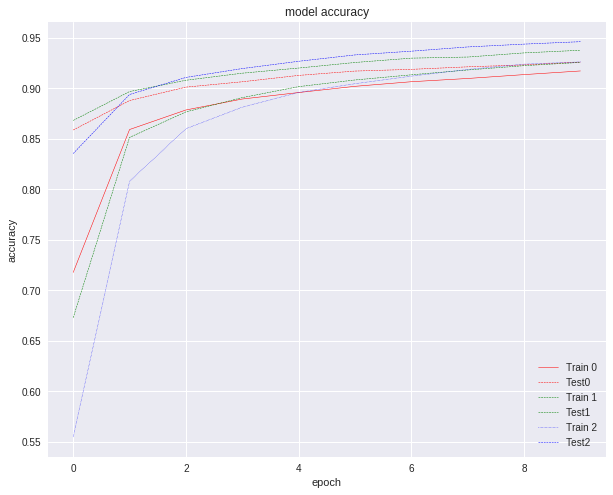

In [13]:
#------------------------ Modified Models-----------------------
myColors = ['r', 'g', 'b', 'y']
plt.figure(figsize = (10, 8))
for i in range(3):
  model = Sequential()
  model.add(Dense(256, input_shape=(784,), activation='relu'))
  model.add(Dropout(0.1))
  neurons = 256
  number_hidden_layers=i
  while number_hidden_layers >= 1:
      neurons = int(neurons/2)
      model.add(Dense(neurons))
      model.add(Activation('relu'))
      model.add(Dropout(0.1))
      number_hidden_layers -= 1
  number_hidden_layers = number_hidden_layers+1
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])
  history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'], c = myColors[i], label = "Train " + str(i))
  plt.plot(history.history['val_acc'], c = myColors[i], label = "Test" + str(i), linestyle = "--")
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend([trainlegend[i], testlegend[i]], loc='upper left')
plt.legend()
# plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
plt.show()
  

As we can see now by changing the parameters the performance of the new architecture is significantly better. We also get an increasing accuracy in contrast with before, which can be attributed to the change of the 
activation function.

Specifically we get:

-For 1 hidden layer: 92.6% 
-For 2 hidden layers: 93.7% 
-For 3 hidden layers: 94.6%




## MNIST Calculator (6 points)

During the lectures you have seen a CNN model that can be successfully trained to classify the MNIST images. You have also seen how a RNN model that can be trained to implement addition of two numbers. You now need to build a model that is a combination of convolutional layers and recurrent cells. 

Using the KERAS library, design and train a model that produces a sum of a sequence of MNIST images. More specifically, the model should input a sequence of 10 images and compute the cumulative sum of the digits represented by the images.

For example:

Input 1: ![294](images/a3ex1.png)

Output 1: 15

Input 2: ![61](images/a3ex2.png)

Output 2: 7

Your solutions should include:
- Python code that formats the MNIST dataset such that it can be used for traning and testing your model
- Implementation in keras of your model (for training and testing)
- Performance on the model on test data
- Justification (in text) of your decisions for the model architecture (type of layers, activation functions, loss function, regularization and training hyperparameters)

Note: Use the 60000/10000 train/test split of the MNIST dataset


In [0]:
import keras.backend as K
import numpy as np

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers.wrappers import TimeDistributed
from keras.layers import Input, RepeatVector, ConvLSTM2D
from keras.layers import Conv2D, MaxPooling2D
from __future__ import print_function

### Python code that formats the MNIST dataset 

In [37]:
######################### Obtain the dataset, as usual #########################

batch_size = 128
nb_classes = 10

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784) # 784 = 28*28
X_test = X_test.reshape(10000, 784)

# Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [0]:
class CharacterTable(object):
    """Given a set of characters:
    + Encode them to a one hot integer representation
    + Decode the one hot integer representation to their character output
    + Decode a vector of probabilities to their character output
    """
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)


class colors:
    ok = '\033[92m'
    fail = '\033[91m'
    close = '\033[0m'

In [38]:
DIGITS = 1 
SUM_LENGTH = 2 # Sum is a.m 2 digits: 90 (9 + 9 + 9 + 9 + 9 + 9 + 9 + 9 + 9 + 9)

chars = '0123456789' # The accepted characters
ctable = CharacterTable(chars) # Create the table

print("Dictionary of characters is: ")
print(ctable.char_indices)

def transform_X_y(X, y):
  # Now we want to obtain sequences of 10 numbers, and sum up its values
  y_aux = y.copy()
  X_input = X.copy()

  # arrays of 10 digits
  X_input = X_input.reshape((-1,10, 28, 28, 1)) #28x28 ; 1 channel
  y_aux = y_aux.reshape((-1,10))

  # Get the true target (sum of the 10 digits)
  y_true = []
  for values in y_aux:
    y_true.append(sum(values))

  # Vectorize  data
  y = np.zeros((len(y_true), SUM_LENGTH, len(chars)), dtype=np.bool)
  
  # Work with np arrays always... 
  y_true = np.asarray(y_true)
  
  # Get the encoded representation of the number (we could use categorical since
  # the beginning btw, but following the tutorial approach)
  for i, result in enumerate(y_true):
      y[i] = ctable.encode(str(result), SUM_LENGTH)

  return X_input, y_true, y

Dictionary of characters is: 
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [40]:
# Get the data we will feed the network with. Our approach is to send 10 digits 
# as images (sequence), so our shapes are (n_obs, 10, width, height, channels)

X_train_input, y_train_true, y_train_seq = transform_X_y(X_train, y_train)
X_test_input, y_test_true, y_test_seq = transform_X_y(X_test, y_test)

print("Train shapes...")
print("X_train_input : {}".format(X_train_input.shape))
print("y_train_true : {}".format(y_train_true.shape))
print("y_train_seq : {}".format(y_train_seq.shape))
print("\nTest shapes...")
print("X_test_input : {}".format(X_test_input.shape))
print("y_test_true : {}".format(y_test_true.shape))
print("y_test_seq : {}".format(y_test_seq.shape))


Train shapes...
X_train_input : (6000, 10, 28, 28, 1)
y_train_true : (6000,)
y_train_seq : (6000, 2, 10)

Test shapes...
X_test_input : (1000, 10, 28, 28, 1)
y_test_true : (1000,)
y_test_seq : (1000, 2, 10)


### Implementation in Keras of the model

In [78]:
# Variables
HIDDEN_SIZE = 128 # length of the h (hidden) vector
input_shape = (10, 28, 28, 1)

# Declare the model
model = Sequential()

# Receive the 10 mnist digits. The first layer is in charge of receiving 10
# images as a convulutional layer. The rest of the layer is the architecture we
# found to work the best in Question 2.
model.add(ConvLSTM2D(32, (3, 3), input_shape = input_shape, 
                     activation = "relu" ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# We indicate that we want two sequences as output
model.add(RepeatVector(2*DIGITS)) # Repeat 2 times to obain 2 y_(t)...

model.add(GRU(HIDDEN_SIZE, return_sequences = True))
model.add(GRU(HIDDEN_SIZE, return_sequences = True))
# We want to obtain the probability of the 10 classes (10 numbers/chars)
model.add(TimeDistributed(Dense(10)))
model.add(Activation('softmax'))
# Usual loss function and optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_9 (ConvLSTM2D)  (None, 26, 26, 32)        38144     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
__________

In [79]:
y_test_aux = y_test.reshape(-1, 10)

for iteration in range(1, 16):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X_train_input, y_train_seq,
              batch_size=128,
              epochs=1,
              validation_data=(X_test_input, y_test_seq))
    
    print("\nQuestion             Prediction   Answer")
    for i in range(10):
        ind = np.random.randint(0, len(X_test_input)) # One index
        # Get the X input and the true label
        digits = X_test_input[np.array([ind])] # A set of 10 digits
        digits_labels = y_test_aux[np.array([ind])]
        q = '+'.join(map(str, digits_labels[0])) 
        correct = y_test_true[ind]
        pred = model.predict_classes(digits, verbose=0)[0]
        prediction = int("{}{}".format(pred[0], pred[1]))
        print(q, "  ", prediction, "       ", correct, "  ", colors.ok 
              if prediction == correct else colors.fail, "☑" 
              if prediction == correct else "☒", colors.close )
        



--------------------------------------------------
Iteration 1
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 23s 4ms/step - loss: 2.0405 - acc: 0.2456 - val_loss: 1.8336 - val_acc: 0.2690



Question             Prediction   Answer
1+3+6+6+2+9+1+9+4+8    47         49     ☒ 
5+4+7+6+7+9+0+5+8+5    47         56     ☒ 
3+0+2+3+4+2+3+0+9+9    47         35     ☒ 
2+3+3+5+7+0+6+8+6+3    47         43     ☒ 
2+6+5+0+1+2+3+4+5+6    43         34     ☒ 
6+6+2+0+0+0+5+8+7+1    47         35     ☒ 
3+6+9+5+9+6+2+4+6+7    43         57     ☒ 
9+0+1+2+3+4+5+6+7+8    42         45     ☒ 
0+1+2+3+4+5+6+7+8+9    43         45     ☒ 
9+3+4+4+6+4+2+1+8+2    47         43     ☒ 

--------------------------------------------------
Iteration 2
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.8434 - acc: 0.2508 - val_loss: 1.7914 - val_acc: 0.2875



Question             Prediction   Answer
0+9+4+4+8+3+2+5+9+7    56         51     ☒ 
3+4+5+6+7+8+9+0+1+2    55         45     ☒ 
2+6+4+7+5+5+5+2+9+2    46         47     ☒ 
8+9+2+3+5+5+9+4+2+1    43         48     ☒ 
7+5+1+3+4+9+4+1+8+5    56         47     ☒ 
9+0+1+7+8+9+9+8+9+8    46         68     ☒ 
9+0+1+2+3+4+5+6+7+8    43         45     ☒ 
4+5+7+2+6+4+9+4+9+4    56         54     ☒ 
4+6+0+4+5+4+1+3+8+6    46         41     ☒ 
1+6+0+0+1+2+3+4+5+6    43         28     ☒ 

--------------------------------------------------
Iteration 3
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.7968 - acc: 0.2655 - val_loss: 1.7364 - val_acc: 0.3285



Question             Prediction   Answer
9+6+1+9+7+7+1+4+8+5    45         57     ☒ 
5+4+3+4+2+8+1+5+1+0    35         33     ☒ 
1+1+1+1+7+2+4+7+5+2    35         31     ☒ 
7+4+2+7+4+9+1+0+6+8    55         48     ☒ 
4+4+1+2+9+1+4+6+9+9    55         49     ☒ 
7+2+0+0+9+1+7+8+7+8    35         49     ☒ 
8+5+7+7+9+1+8+1+8+0    45         54     ☒ 
9+9+5+5+1+5+6+0+3+4    45         47     ☒ 
6+7+3+1+7+1+8+2+0+2    45         37     ☒ 
4+9+9+7+1+1+9+0+7+8    45         55     ☒ 

--------------------------------------------------
Iteration 4
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.7605 - acc: 0.2860 - val_loss: 1.7146 - val_acc: 0.3190



Question             Prediction   Answer
0+7+6+6+9+3+7+0+5+2    45         45     ☑ 
7+8+1+1+2+9+7+8+4+0    46         47     ☒ 
0+1+2+3+4+5+6+7+8+9    45         45     ☑ 
8+7+9+4+8+8+7+9+7+1    56         68     ☒ 
3+3+8+4+1+1+9+7+4+3    43         43     ☑ 
0+7+3+5+4+2+4+1+8+3    45         37     ☒ 
6+3+4+4+2+8+1+0+6+4    44         38     ☒ 
6+9+8+4+3+7+1+6+4+5    56         53     ☒ 
5+4+8+8+4+0+0+2+3+2    45         36     ☒ 
4+7+3+9+8+8+4+7+1+2    46         53     ☒ 

--------------------------------------------------
Iteration 5
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.7416 - acc: 0.2918 - val_loss: 1.7054 - val_acc: 0.2975



Question             Prediction   Answer
3+6+9+6+0+2+7+4+4+4    40         45     ☒ 
4+3+2+3+5+6+8+8+6+2    40         47     ☒ 
3+4+5+6+7+8+9+0+1+2    50         45     ☒ 
9+4+5+8+4+2+9+7+0+0    51         48     ☒ 
7+2+3+4+0+2+1+8+3+5    39         35     ☒ 
1+6+8+9+9+0+1+2+4+4    40         44     ☒ 
7+1+3+4+5+8+0+9+1+3    40         41     ☒ 
9+0+1+2+3+5+6+0+1+2    30         29     ☒ 
4+9+0+0+5+2+5+0+7+1    40         33     ☒ 
8+7+9+4+8+8+7+9+7+1    50         68     ☒ 

--------------------------------------------------
Iteration 6
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.7189 - acc: 0.3018 - val_loss: 1.7303 - val_acc: 0.2790



Question             Prediction   Answer
4+6+0+4+5+4+1+3+8+6    40         41     ☒ 
5+8+8+0+9+3+2+7+8+4    52         54     ☒ 
9+4+4+7+6+5+4+1+9+9    52         58     ☒ 
2+3+7+8+1+0+0+2+1+6    32         30     ☒ 
2+8+5+8+5+1+1+4+4+3    52         41     ☒ 
2+0+9+7+6+7+4+1+6+2    52         44     ☒ 
4+0+5+0+4+4+7+9+3+4    52         40     ☒ 
1+7+7+4+8+0+7+3+1+3    32         41     ☒ 
5+9+1+4+2+0+2+7+0+9    32         39     ☒ 
3+6+9+3+1+4+1+7+6+9    52         49     ☒ 

--------------------------------------------------
Iteration 7
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6963 - acc: 0.3101 - val_loss: 1.6644 - val_acc: 0.3125



Question             Prediction   Answer
2+2+0+8+9+2+5+1+0+8    22         37     ☒ 
6+9+8+4+3+7+1+6+4+5    52         53     ☒ 
8+1+4+7+5+7+2+2+0+0    39         36     ☒ 
0+8+9+8+9+4+2+5+7+9    52         61     ☒ 
5+5+4+0+8+2+1+0+8+4    42         37     ☒ 
7+4+7+0+0+6+6+6+3+7    48         46     ☒ 
6+9+8+7+1+1+6+7+6+3    52         54     ☒ 
3+4+5+6+7+8+9+0+1+2    42         45     ☒ 
2+7+8+1+7+1+3+8+5+4    49         46     ☒ 
6+8+8+0+1+2+3+4+7+8    52         47     ☒ 

--------------------------------------------------
Iteration 8
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6757 - acc: 0.3201 - val_loss: 1.6663 - val_acc: 0.3175



Question             Prediction   Answer
8+7+3+9+7+4+4+4+9+2    53         57     ☒ 
3+4+5+6+7+8+9+0+1+2    43         45     ☒ 
1+7+9+1+9+2+6+7+6+6    53         54     ☒ 
0+1+2+3+4+5+6+7+8+9    43         45     ☒ 
4+5+6+7+8+9+0+1+2+3    46         45     ☒ 
4+7+7+7+9+8+4+3+8+2    53         59     ☒ 
5+2+0+9+1+8+6+2+3+9    36         45     ☒ 
6+2+7+3+3+2+1+0+7+3    36         34     ☒ 
8+9+6+1+8+4+1+2+5+9    53         53     ☑ 
8+4+0+0+7+2+4+3+8+6    36         42     ☒ 

--------------------------------------------------
Iteration 9
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6608 - acc: 0.3298 - val_loss: 1.6536 - val_acc: 0.3290



Question             Prediction   Answer
9+8+6+6+4+2+6+9+2+8    59         60     ☒ 
7+1+3+5+4+3+3+5+5+6    49         42     ☒ 
4+6+0+4+5+4+1+3+8+6    49         41     ☒ 
6+7+3+1+7+1+8+2+0+2    49         37     ☒ 
4+0+5+0+4+4+7+9+3+4    51         40     ☒ 
5+7+6+9+1+4+1+6+4+2    59         45     ☒ 
1+3+6+6+2+9+1+9+4+8    41         49     ☒ 
0+0+8+3+4+3+1+5+0+0    31         24     ☒ 
4+4+1+2+9+1+4+6+9+9    41         49     ☒ 
4+7+2+8+4+7+0+6+2+8    39         48     ☒ 

--------------------------------------------------
Iteration 10
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6476 - acc: 0.3313 - val_loss: 1.6503 - val_acc: 0.3170



Question             Prediction   Answer
4+9+0+0+5+2+5+0+7+1    46         33     ☒ 
6+0+5+4+9+9+2+1+9+4    46         49     ☒ 
4+4+1+5+2+8+3+4+9+5    46         45     ☒ 
6+2+5+4+1+9+2+1+5+8    46         43     ☒ 
7+4+2+1+5+4+5+5+8+6    46         47     ☒ 
5+0+2+7+4+6+6+8+6+6    56         50     ☒ 
6+9+2+3+3+7+7+0+0+7    56         44     ☒ 
0+8+4+6+2+6+7+9+3+2    46         47     ☒ 
3+4+5+8+9+0+1+2+3+4    46         39     ☒ 
5+6+7+8+9+0+1+2+3+4    46         45     ☒ 

--------------------------------------------------
Iteration 11
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6391 - acc: 0.3359 - val_loss: 1.6309 - val_acc: 0.3335



Question             Prediction   Answer
8+9+0+1+2+3+4+5+6+7    46         45     ☒ 
9+9+0+0+1+8+8+4+3+4    46         46     ☑ 
0+3+1+8+6+7+5+9+9+3    56         51     ☒ 
9+4+7+0+2+3+4+0+0+8    46         37     ☒ 
7+8+9+0+1+2+3+4+7+8    46         49     ☒ 
0+6+1+6+8+7+0+1+5+0    36         34     ☒ 
9+3+4+0+7+9+6+4+1+4    46         47     ☒ 
5+6+7+8+9+0+1+2+3+5    46         46     ☑ 
2+7+8+1+7+1+3+8+5+4    46         46     ☑ 
8+7+8+9+0+8+4+4+5+8    56         61     ☒ 

--------------------------------------------------
Iteration 12
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6311 - acc: 0.3407 - val_loss: 1.6237 - val_acc: 0.3490



Question             Prediction   Answer
5+6+2+3+9+2+6+0+0+6    33         39     ☒ 
4+7+6+2+2+0+9+4+0+1    33         35     ☒ 
7+2+6+9+3+1+4+6+2+5    43         45     ☒ 
8+9+0+1+2+3+4+5+6+7    43         45     ☒ 
5+8+2+6+2+2+5+6+5+0    43         41     ☒ 
9+2+7+1+8+8+8+2+7+6    43         58     ☒ 
1+6+0+0+1+2+3+4+5+6    30         28     ☒ 
9+5+8+6+2+6+2+8+1+7    46         54     ☒ 
3+6+9+8+7+1+0+5+7+1    43         47     ☒ 
5+2+2+0+9+2+6+6+0+1    43         33     ☒ 

--------------------------------------------------
Iteration 13
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6177 - acc: 0.3540 - val_loss: 1.6395 - val_acc: 0.3340



Question             Prediction   Answer
0+3+3+8+4+3+6+3+5+0    41         35     ☒ 
7+7+4+7+7+3+7+4+5+4    51         55     ☒ 
8+3+8+1+5+3+5+0+5+5    41         43     ☒ 
9+3+9+2+2+9+2+1+8+3    46         48     ☒ 
9+9+0+0+1+8+8+4+3+4    41         46     ☒ 
6+9+9+9+2+1+6+1+3+5    41         51     ☒ 
6+0+8+2+9+2+8+8+8+8    41         59     ☒ 
0+0+3+0+2+6+6+4+9+3    41         33     ☒ 
5+6+9+3+6+3+6+0+1+2    41         41     ☑ 
5+5+9+1+7+5+4+9+1+2    41         48     ☒ 

--------------------------------------------------
Iteration 14
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6173 - acc: 0.3511 - val_loss: 1.6107 - val_acc: 0.3520



Question             Prediction   Answer
4+9+8+3+7+4+0+4+7+8    46         54     ☒ 
4+6+1+0+4+5+3+9+4+2    46         38     ☒ 
8+1+0+0+7+7+8+7+5+0    41         43     ☒ 
3+1+9+0+9+3+6+8+7+0    46         46     ☑ 
1+3+5+0+7+8+1+5+1+4    36         35     ☒ 
0+3+9+2+8+1+4+3+5+2    31         37     ☒ 
7+5+8+8+3+8+9+2+6+2    56         58     ☒ 
6+7+1+2+5+8+0+3+7+2    33         41     ☒ 
7+6+2+7+8+4+7+3+6+1    56         51     ☒ 
2+4+4+3+3+6+9+9+5+8    56         53     ☒ 

--------------------------------------------------
Iteration 15
Train on 6000 samples, validate on 1000 samples
Epoch 1/1
6000/6000 [==============================] - 20s 3ms/step - loss: 1.6109 - acc: 0.3547 - val_loss: 1.6169 - val_acc: 0.3450



Question             Prediction   Answer
6+3+7+7+4+4+3+9+2+8    53         53     ☑ 
8+6+5+9+0+0+0+3+7+1    36         39     ☒ 
3+7+8+0+1+2+3+4+7+8    46         43     ☒ 
0+4+4+4+4+6+1+2+3+3    36         31     ☒ 
1+8+0+2+0+5+2+1+3+7    39         29     ☒ 
2+3+4+7+8+9+0+8+3+9    53         53     ☑ 
0+9+4+4+8+3+2+5+9+7    51         51     ☑ 
2+9+7+2+1+1+3+7+5+3    36         40     ☒ 
0+1+2+1+3+2+0+7+2+6    36         24     ☒ 
8+6+1+0+2+1+4+0+1+2    26         25     ☒ 


### Performance in test data 

In [81]:
score = model.evaluate(X_test_input, y_test_seq, verbose = 1)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

1000/1000 [==============================] - 2s 2ms/step

Test loss: 1.616915943145752
Test accuracy: 0.345


### Justification

For this task, we were asked to train a Neural Network that is the combination of Convolutional Layers and Recurrent units to solve the problem of summing up a set of 10 images from the MNIST dataset. This is, we want to input a sequence of 10 digits images ($x_1 ... x_{10}$) and output the sum of these digits ($Y$).

In order to achieve this, we create a delayed sequence-to-sequence model where the input sequence are the 10 digits (images) to sum up and the output sequence  is the decomposition of $Y$ into digits (e.g. if the result is 45, the sequence is \[4, 5\]). Note that at the most, we can have a result of two digits $(y_1, y_2)$, since the maximum value of each digit is 9 and `9x10=90`. The architecture of our model is then based on this approach and we can depict it as next:

- Convolutional component
 - Receive 10 `28x28x1` images with the `ConvLSTM2D` layer
 - Then, apply a set of Conv2D, MaxPooling and Dropout layers to build the features of the images as we would to in a CNN
 - After the last convolution layer, we flatten the resulting vector and pass that to the RNN component to form a fully-connected layer
- Recurrent component
 - Two GRU units that
 - A Dense layer to predict the sequence of two digits that represent the sum of the 10 images, by means of a softmax function.

In the previous cells we showed this architecture in detail. 

For the Convolutional component we have just followed a typical CNN architecture where at each layer the size of the feature maps would increase (32 -> 64) and Dropout layers for regularization were applied. On the other hand, for the Recurrent unit, we have tested different units (GRU, LSTM and SimpleRNN) but GRU was the one with the best accuracy.

We can observe that after 15 epochs, the model is not able to learn all the correct sums, indeed our accuracy is low (34%). This is somehow expected since we are learning from images and not the actual digits. More specifically, we are extracting the features of the images and based on them predicting $y$. One can say that the problem itself is complex since we only have 10 digits and very similar sums (expected value of the sum is 45), and even in that setting the model is learning to predict results that are not really far from the true answer, as observed in the output.

It comes important to mention that while testing we have tried a different model, where based on the convolutional layers we would predict a real number (regression). However, with that approach the model learned to predict the expected value of the sums (45) for any input and we decided to drop it.
